In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [2]:
import keras

if keras.backend.backend() == "torch":
    import torch
    torch.autograd.set_grad_enabled(False)

In [3]:
import bayesflow as bf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
simulator = bf.simulators.TwoMoonsSimulator()
dataset = bf.datasets.OnlineDataset(simulator, batch_size=256)

In [5]:
inference_network = bf.networks.CouplingFlow()
# inference_network = bf.networks.FlowMatching()

In [6]:
approximator = bf.Approximator(
    inference_network=inference_network,
    inference_variables=["theta"],
    inference_conditions=["x"],
)

In [7]:
approximator.compile(optimizer="AdamW")

In [8]:
approximator.fit(dataset, epochs=50, steps_per_epoch=16)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.6250
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: -0.8286
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: -0.5241
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: -0.6141
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: -1.4221
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: -1.6415
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: -1.9118
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: -2.1536
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: -0.1571
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: -0.5735
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: -1.0978
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: -1.9203
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.0561
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0239
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 

In [9]:
data = {"x": keras.ops.zeros((256, 2))}
samples = approximator.sample(256, data=data)

In [10]:
samples = {"theta1": samples["theta"][:, 0], "theta2": samples["theta"][:, 1]}

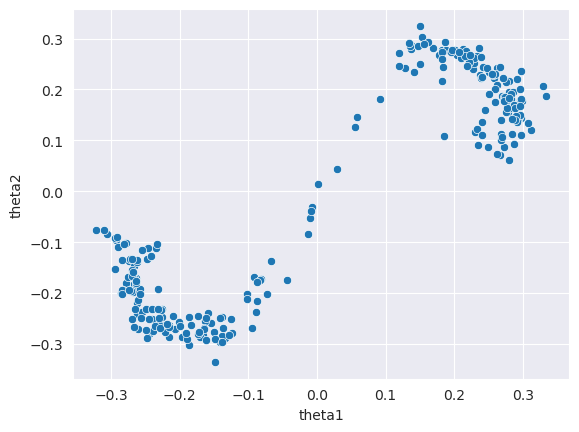

In [11]:
sns.scatterplot(samples, x="theta1", y="theta2")
plt.show()